In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import re

%matplotlib inline  

C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\traitlets\traitlets.py:1009: DeprecationWarning: Widget._active_widgets is deprecated.
  value = getattr(cls, name)
C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\traitlets\traitlets.py:1009: DeprecationWarning: Widget._widget_types is deprecated.
  value = getattr(cls, name)
C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\traitlets\traitlets.py:1009: DeprecationWarning: Widget.widget_types is deprecated.
  value = getattr(cls, name)
C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\traitlets\traitlets.py:1009: DeprecationWarning: Widget.widgets is deprecated.
  value = getattr(cls, name)


In [2]:
cov  = pd.read_csv("D:/s3/apprentisange/COVID/1_VAG1ERMRT__datavers0210.csv", sep=";", encoding="UTF-8", decimal=",", header=0)
co  = pd.read_csv("D:/s3/apprentisange/COVID/2_VAG1ERMRT__datavers0210-sectemploi.csv", sep=";", encoding="UTF-8", decimal=",", header=0)

In [3]:
cov.shape

(1204, 244)

In [4]:
co.shape

(1477, 51)

In [5]:
co.head(2)

,US_ORDRE,A7,A1,A2,A3,A6_1,A6_2,STRATE,SEC,A8,...,E3E,E4A,E4B,ID2,NOM2,E4C,E4CAUTRE1,E4D,E4E,E5
0,2,3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,...,,0,,,,,,,,Diminnué
1,2,3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,...,,0,,,,,,,,Diminnué


In [6]:
cov.head(2)

,US_ORDRE,A7,A1,A2,A3,A6_1,A6_2,STRATE,SEC,A8,...,F7C,F7D,F7E,F7F,A16,A16H,A16M,heur_deb,heur_fin,durinterv
0,2,3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,...,NSP,Non,NSP,Non,1055,10,55,10:24:00,10:55:00,0:31:00
1,2,8,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,principale,مسعودة بنت محمد,...,NSP,Non,NSP,NSP,1312,13,12,13:11:00,13:12:00,0:01:00


In [7]:
# Create a new identifier column in both dataframes
cov['id_men'] = cov['A7'] + cov['US_ORDRE'] * 100
co['id_men'] = co['A7'] + co['US_ORDRE'] * 100

In [8]:
# Find columns in co but not in cov
cols_to_merge = co.columns.difference(cov.columns).tolist()

In [9]:
# Include 'id_men' in the selected columns
cols_to_merge.append('id_men')

In [10]:
# Create a dataframe with selected columns
cols = co[cols_to_merge]

In [11]:
# Merge cols with cov
covid = pd.merge(cov, cols, on='id_men')

In [12]:
# Drop 'US_ORDRE' and 'A7' columns
covid = covid.drop(['US_ORDRE', 'A7'], axis=1)

In [13]:
covid.head()

,A1,A2,A3,A6_1,A6_2,STRATE,SEC,A8,A8A,A8B,...,E4C,E4CAUTRE1,E4D,E4E,ID,ID1,ID2,NOM,NOM1,NOM2
0,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,44015667.0,99999999,...,,,,,1,,,توتو,,
1,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,44015667.0,99999999,...,,,,,2,,,محمد,,
2,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,44015667.0,99999999,...,,,,,3,,,الطالب بوي,,
3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,principale,الشيخ بوي ولد اعمر فال,22420172.0,99999999,...,,,,,1,,,خوه ولد النعمة,,
4,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,principale,الشيخ بوي ولد اعمر فال,22420172.0,99999999,...,,,,,2,,,اعمر فال,,


In [14]:
covid.shape

(1477, 259)

In [15]:
# List of selected columns
selected_columns = [ 'A1', 'A2', 'A3',"B22","B23",'C1A', 'C1B', 'C1C', 'C1D', 'C1E',
                    'C1F', 'C1G', 'C1H', 'C2A', 'C2B', 'C2C', 'C2D1', 'C2D2A', 'C2D2B', 'C2D2D', 'C2D2E', 'C2D2F',
                    'C2EA', 
                    # 'C2EB', 'C2EC', 'C2ED',
                    'D1A', 'D1B', 'D1C1',  'D2A', 'D2B', 'D2C', 'D2DA','D2DC','D2DD',
                    'D2DE','D2EA', 'D2EB', 'D2EC', 'D2ED', 'D2EE', 'D2EF', 'D2EG', 'D3A', 'D3B', 'D3C', 'D3D', 
                    'D3E', 'E1A', 'E1B', 'E1C', 'E1D', 'E2A',  "E2B",'E3A', 'E2C', 'E3C', 'E3D',  'E3E','E4C',
                    'E4D', 'E4E',  'E3B', 'E4A', 'E4B',  'E5', 'F1','F3', 'F4', 'F5', 'F2A','F2B','F6A', 'F6B', 
                    'F6C', 'F6D', 'F6E', 'F6F', 'F7A', 'F7B', 'F7C', 'F7D', 'F7E', 'F7F']

In [16]:
# Create a new dataframe with selected columns
df = covid[selected_columns].copy()

# Data Cleaning and Preprocessing:


In [17]:
df.shape

(1477, 81)

In [18]:
column_mapping = {
    'A1': 'Wilaya',
    'A2': 'Moughataa',
    'A3': 'Commune',
    'B22': 'Sexe',
    'B23': 'Age'
}

In [19]:
df.rename(columns=column_mapping, inplace=True)

In [20]:
df.replace(' ', np.nan, inplace=True)

In [21]:
df.filter(regex=re.compile('^D1'))

,D1A,D1B,D1C1
0,Quantité et Qualité inférieure,E,Plus chers maintenant
1,Quantité et Qualité inférieure,E,Plus chers maintenant
2,Quantité et Qualité inférieure,E,Plus chers maintenant
3,Comme d'habitude,NaN,Plus chers maintenant
4,Comme d'habitude,NaN,Plus chers maintenant
...,...,...,...
1472,Quantité inférieure,A C,Plus chers maintenant
1473,Quantité inférieure,A C,Plus chers maintenant
1474,Quantité inférieure,A C,Plus chers maintenant
1475,Quantité inférieure,A C,Plus chers maintenant


In [22]:
# Here I want to remove leading and trailing spaces from all the columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [23]:
#here I want to remove all spaces within the string values
# df = df.applymap(lambda x: ''.join(x.split()) if isinstance(x, str) else x)

In [24]:
df['C1B'] = df['C1B'].replace('Radio', 'A')
df['C1C'] = df['C1C'].replace('Se laver les mains', 'A')
df['C1D'] = df['C1D'].replace('Se laver les mains', 'A')
df['C1F'] = df['C1F'].replace('Sensibilisation sur les mesures barrières', 'A')
df['C1H'] = df['C1H'].replace('Sensibilisation sur les mesures barrières', 'A')
df['C2B'] = df['C2B'].replace('Transfert d’argent (Cash)', 'A')
df['C2C'] = df['C2C'].replace('Etat', 'A')
df['D1B'] = df['D1B'].replace("Manque d'argent", 'A')
df['D2B'] = df['D2B'].replace('Pas de malade', 'A')
df['D2C'] = df['D2C'].replace('Maladie d’un membre (Atteint du COVID-19)', 'A')
df['D3C'] = df['D3C'].replace('A domicile', 'A')
df['D3E'] = df['D3E'].replace('Compléter des devoirs imprimés, y compris ceux fournis par les enseignants', 'A')
df['C1D'] = df['C1D'].replace('Se laver les mains', 'A')

In [25]:
for cl in df.filter(regex=re.compile('^D')).columns:
    print(cl, df[cl].dropna().unique())

D1A ['Quantité et Qualité inférieure' "Comme d'habitude" 'Quantité supérieure'
 'Quantité inférieure' 'Qualité inférieure'
 'Quantité et qualité supérieures' 'Qualité meilleure']
D1B ['E' 'A' 'A C' 'F' 'C' 'A      H' 'BC' 'AB' 'A C    H' 'ABC   G' 'H'
 'A   E' 'ABC' 'A    F' 'A C E' 'C E' 'B' 'A C E G' 'ABC E' 'C EF' 'ABCD'
 'BCD' 'A  D' 'A     G' 'AB  EF' 'C  F' 'EF' 'AB   F' 'A   EF' 'B  E'
 'A   E  H' 'A C E  H' 'G' 'B   F' 'A  DE' 'AB  E' 'F H' 'A C  F']
D1C1 ['Plus chers maintenant' 'Même niveau' 'Moins chers maintenant']
D2A ['Oui' 'Non']
D2B ['A' 'F' 'C' 'E' 'DE' 'BC' 'B' 'CD' 'C E' 'D' 'A C' 'A   E']
D2C ['D' 'B' 'B D' 'G' 'E' 'A' 'CD' 'B   F' 'C' 'BC' 'AB' 'F' 'B DE' 'B    G'
 'B  E' 'A     G']
D2DA ['Moyenne' 'Mauvaise' 'Bonne']
D2DC ['Bonne' 'Mauvaise' 'Moyenne']
D2DD ['Bonne' 'Mauvaise' 'Moyenne']
D2DE ['Bonne' 'Moyenne' 'Mauvaise']
D2EA ['Non' 'Oui']
D2EB ['Non' 'Oui']
D2EC ['Non' 'Oui']
D2ED ['Non' 'Oui']
D2EE ['Non' 'Oui']
D2EF ['Non' 'Oui']
D2EG ['Non' 'Oui']
D3A ['Oui'

In [26]:
# I want to convert column 'C2D1' to integer type because it is an ammount of money

df['C2D1'] = df['C2D1'].fillna(0).astype(int)
df['C2D2A'] = df['C2D2A'].fillna(0).astype(float)
df['C2D2B'] = df['C2D2B'].fillna(0).astype(float)
df['C2D2D'] = df['C2D2D'].fillna(0).astype(float)

In [27]:
df['C2D2A'].dropna().unique()

array([ 0., 25., 50.,  2.,  5.,  4., 30.,  7., 10.,  8.,  6., 13., 75.,
       12., 20.])

In [28]:
df.shape

(1477, 81)

In [29]:
df.shape

(1477, 81)

# Exploratory Data Analysis (EDA):

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Wilaya     1477 non-null   object 
 1   Moughataa  1477 non-null   object 
 2   Commune    1477 non-null   object 
 3   Sexe       1477 non-null   object 
 4   Age        1477 non-null   int64  
 5   C1A        1477 non-null   object 
 6   C1B        1476 non-null   object 
 7   C1C        1476 non-null   object 
 8   C1D        1435 non-null   object 
 9   C1E        1476 non-null   object 
 10  C1F        596 non-null    object 
 11  C1G        1476 non-null   object 
 12  C1H        803 non-null    object 
 13  C2A        1477 non-null   object 
 14  C2B        402 non-null    object 
 15  C2C        402 non-null    object 
 16  C2D1       1477 non-null   int32  
 17  C2D2A      1477 non-null   float64
 18  C2D2B      1477 non-null   float64
 19  C2D2D      1477 non-null   float64
 20  C2D2E   

In [31]:
df.describe().T

C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=1, interpolation=interpolation)


,count,mean,std,min,25%,50%,75%,max
Age,1477.0,44.653351,13.914093,18.0,35.0,43.0,53.0,93.0
C2D1,1477.0,4935.727827,14904.397850,0.0,0.0,0.0,0.0,225000.0
C2D2A,1477.0,1.808395,7.572270,0.0,0.0,0.0,0.0,75.0
C2D2B,1477.0,0.354096,1.585804,0.0,0.0,0.0,0.0,20.0
C2D2D,1477.0,0.735274,3.985024,0.0,0.0,0.0,0.0,70.0


In [32]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


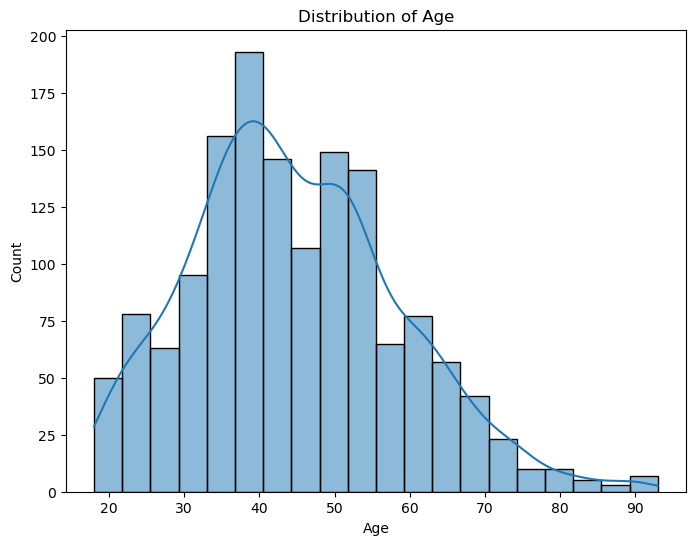

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title(f'Distribution of Age')
plt.show()

In [34]:
df.columns

Index(['Wilaya', 'Moughataa', 'Commune', 'Sexe', 'Age', 'C1A', 'C1B', 'C1C',
       'C1D', 'C1E', 'C1F', 'C1G', 'C1H', 'C2A', 'C2B', 'C2C', 'C2D1', 'C2D2A',
       'C2D2B', 'C2D2D', 'C2D2E', 'C2D2F', 'C2EA', 'D1A', 'D1B', 'D1C1', 'D2A',
       'D2B', 'D2C', 'D2DA', 'D2DC', 'D2DD', 'D2DE', 'D2EA', 'D2EB', 'D2EC',
       'D2ED', 'D2EE', 'D2EF', 'D2EG', 'D3A', 'D3B', 'D3C', 'D3D', 'D3E',
       'E1A', 'E1B', 'E1C', 'E1D', 'E2A', 'E2B', 'E3A', 'E2C', 'E3C', 'E3D',
       'E3E', 'E4C', 'E4D', 'E4E', 'E3B', 'E4A', 'E4B', 'E5', 'F1', 'F3', 'F4',
       'F5', 'F2A', 'F2B', 'F6A', 'F6B', 'F6C', 'F6D', 'F6E', 'F6F', 'F7A',
       'F7B', 'F7C', 'F7D', 'F7E', 'F7F'],
      dtype='object')

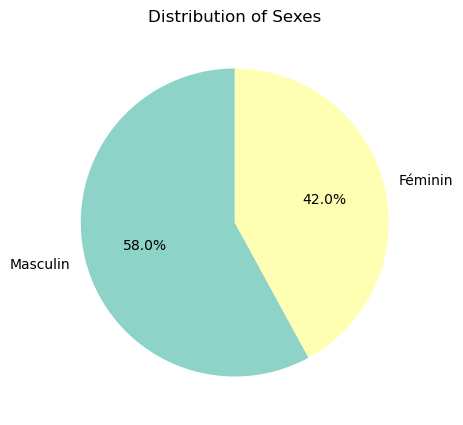

In [35]:
plt.figure(figsize=(5, 5))
sex_counts = df['Sexe'].value_counts()

# Plotting the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title('Distribution of Sexes')
plt.show()

## CONNAISSSANCE DE LA COVID-19 ET PREVENTION

In [36]:
df['C1C']

0       A CDE   I
1       A CDE   I
2       A CDE   I
3        A C    H
4        A C    H
          ...    
1472     A  D  GH
1473     A  D  GH
1474       A  D F
1475      A C   G
1476     ABC   GH
Name: C1C, Length: 1477, dtype: object

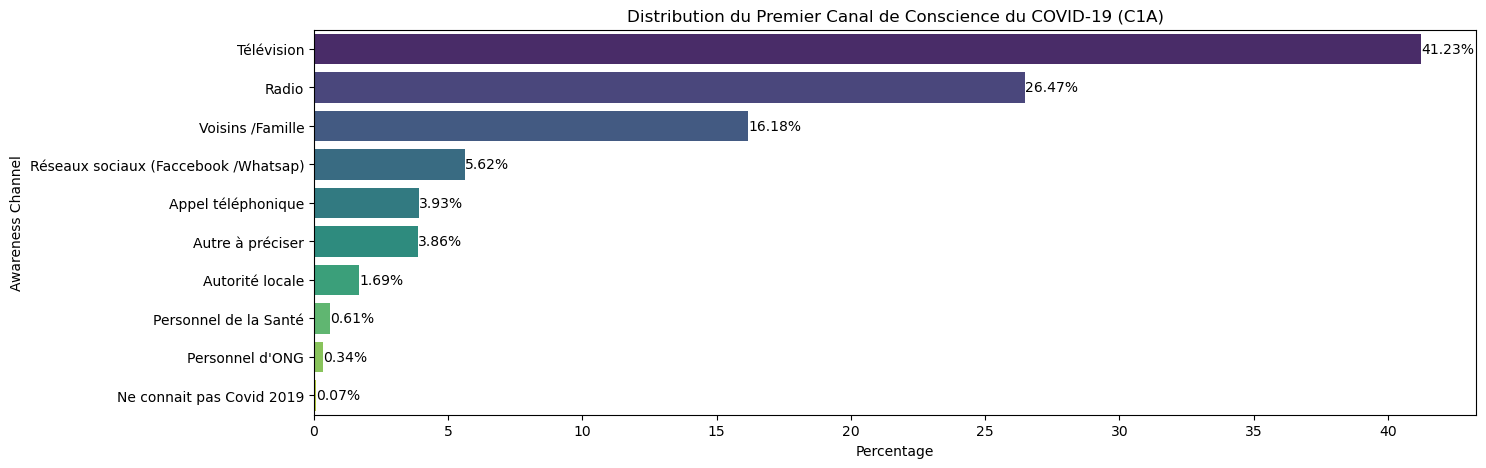

In [37]:
plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values = df['C1A'].value_counts(normalize=True) * 100

# Create a horizontal bar plot
sns.barplot(x=percentage_values, y=percentage_values.index, palette='viridis')

# Adding percentages on the bars
for index, value in enumerate(percentage_values):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.title('Distribution du Premier Canal de Conscience du COVID-19 (C1A)')
plt.xlabel('Percentage')
plt.ylabel('Awareness Channel')
plt.show()


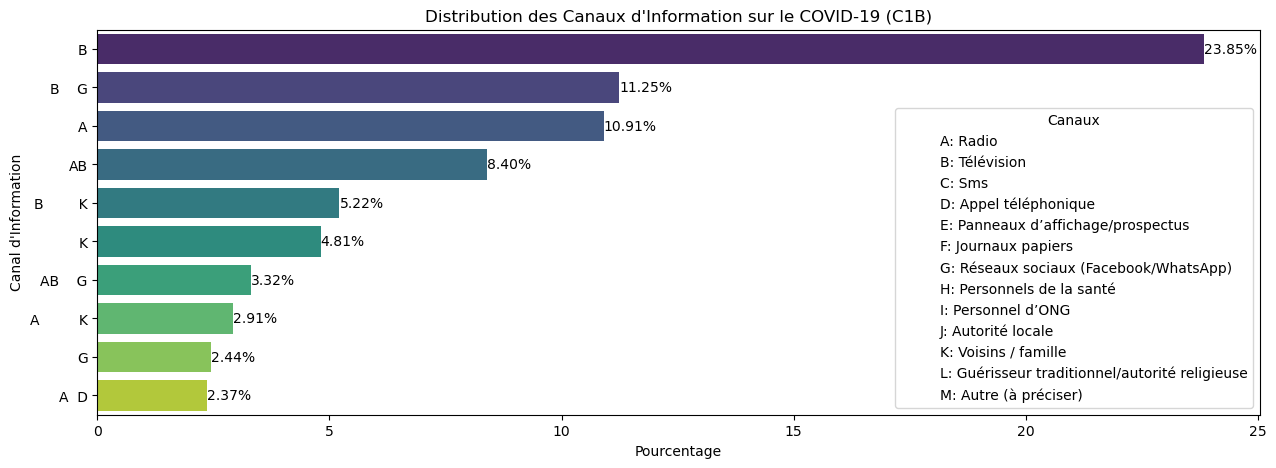

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping between codes and their meanings
channels_mapping = {
    'A': 'Radio', 'B': 'Télévision','C': 'Sms','D': 'Appel téléphonique','E': 'Panneaux d’affichage/prospectus','F': 'Journaux papiers','G': 'Réseaux sociaux (Facebook/WhatsApp)', 'H': 'Personnels de la santé','I': 'Personnel d’ONG','J': 'Autorité locale', 'K': 'Voisins / famille', 'L': 'Guérisseur traditionnel/autorité religieuse','M': 'Autre (à préciser)'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1B = df['C1B'].value_counts(normalize=True) * 100

# Select only the top 10 channels
top_channels = percentage_values_C1B.head(10)

# Define smaller bar width
bar_width = 0.4

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_channels, y=top_channels.index, palette='viridis', errorbar=None, dodge=True, saturation=0.75)

# Adding percentages on the bars
for index, value in enumerate(top_channels):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {channel}')
           for code, channel in channels_mapping.items()]
plt.legend(handles=handles, title='Canaux', loc='lower right')

plt.title('Distribution des Canaux d\'Information sur le COVID-19 (C1B)')
plt.xlabel('Pourcentage')
plt.ylabel('Canal d\'Information')
plt.show()


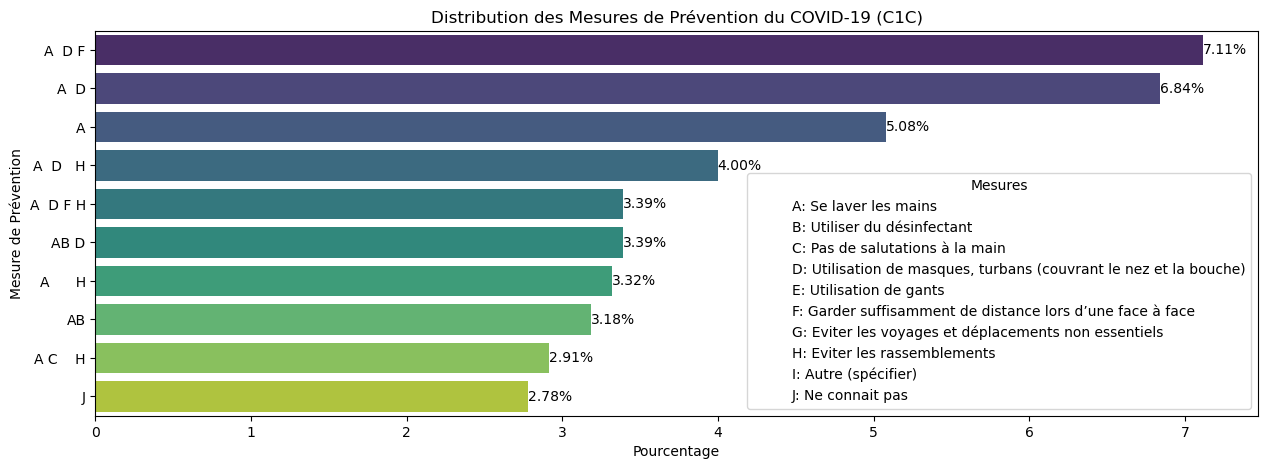

In [39]:
measures_mapping = {
    'A': 'Se laver les mains','B': 'Utiliser du désinfectant','C': 'Pas de salutations à la main', 'D': 'Utilisation de masques, turbans (couvrant le nez et la bouche)', 'E': 'Utilisation de gants', 'F': 'Garder suffisamment de distance lors d’une face à face', 'G': 'Eviter les voyages et déplacements non essentiels','H': 'Eviter les rassemblements','I': 'Autre (spécifier)',  'J': 'Ne connait pas'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1C = df['C1C'].value_counts(normalize=True) * 100

# Select only the top 10 measures
top_measures = percentage_values_C1C.head(10)

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_measures, y=top_measures.index, palette='viridis', errorbar=None, saturation=0.7)

# Adding percentages on the bars
for index, value in enumerate(top_measures):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {measure}')
           for code, measure in measures_mapping.items()]
plt.legend(handles=handles, title='Mesures', loc='lower right')

plt.title('Distribution des Mesures de Prévention du COVID-19 (C1C)')
plt.xlabel('Pourcentage')
plt.ylabel('Mesure de Prévention')
plt.show()


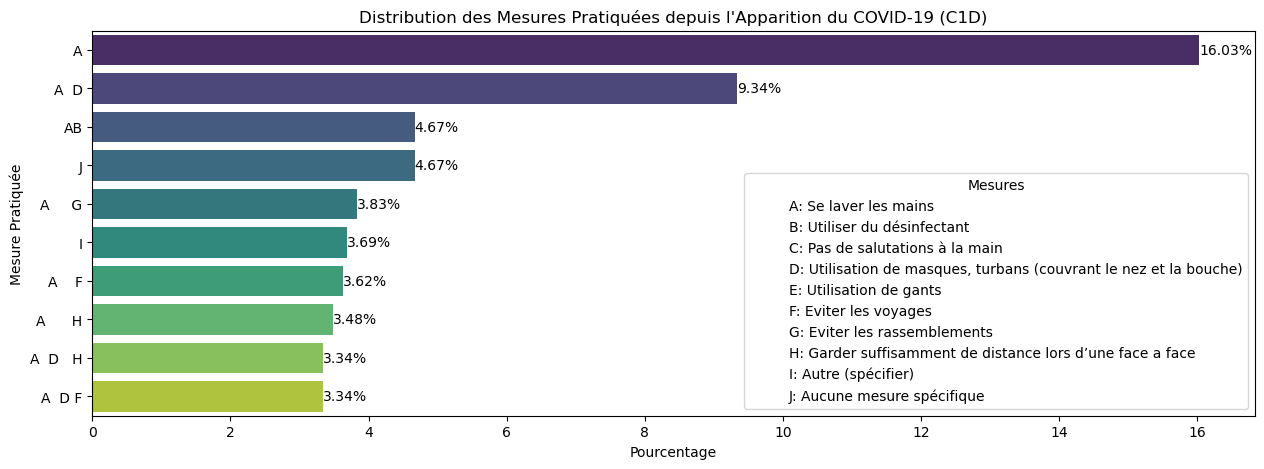

In [40]:

measures_mapping = {'A': 'Se laver les mains', 'B': 'Utiliser du désinfectant', 'C': 'Pas de salutations à la main','D': 'Utilisation de masques, turbans (couvrant le nez et la bouche)', 'E': 'Utilisation de gants', 'F': 'Eviter les voyages', 'G': 'Eviter les rassemblements','H': 'Garder suffisamment de distance lors d’une face a face', 'I': 'Autre (spécifier)','J': 'Aucune mesure spécifique'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1D = df['C1D'].value_counts(normalize=True) * 100

# Select only the top 10 measures
top_measures = percentage_values_C1D.head(10)

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_measures, y=top_measures.index, palette='viridis', errorbar=None, saturation=0.7)

# Adding percentages on the bars
for index, value in enumerate(top_measures):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {measure}')
           for code, measure in measures_mapping.items()]
plt.legend(handles=handles, title='Mesures', loc='lower right')

plt.title('Distribution des Mesures Pratiquées depuis l\'Apparition du COVID-19 (C1D)')
plt.xlabel('Pourcentage')
plt.ylabel('Mesure Pratiquée')
plt.show()


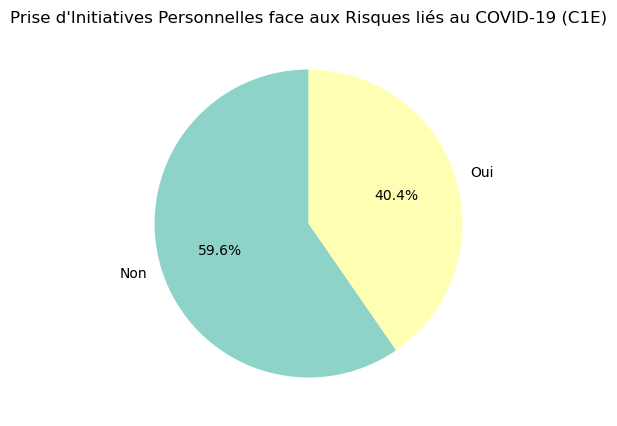

In [41]:
plt.figure(figsize=(5, 5))
initia = df['C1E'].value_counts()

# Plotting the pie chart
plt.pie(initia, labels=initia.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title('Prise d\'Initiatives Personnelles face aux Risques liés au COVID-19 (C1E)')
plt.show()

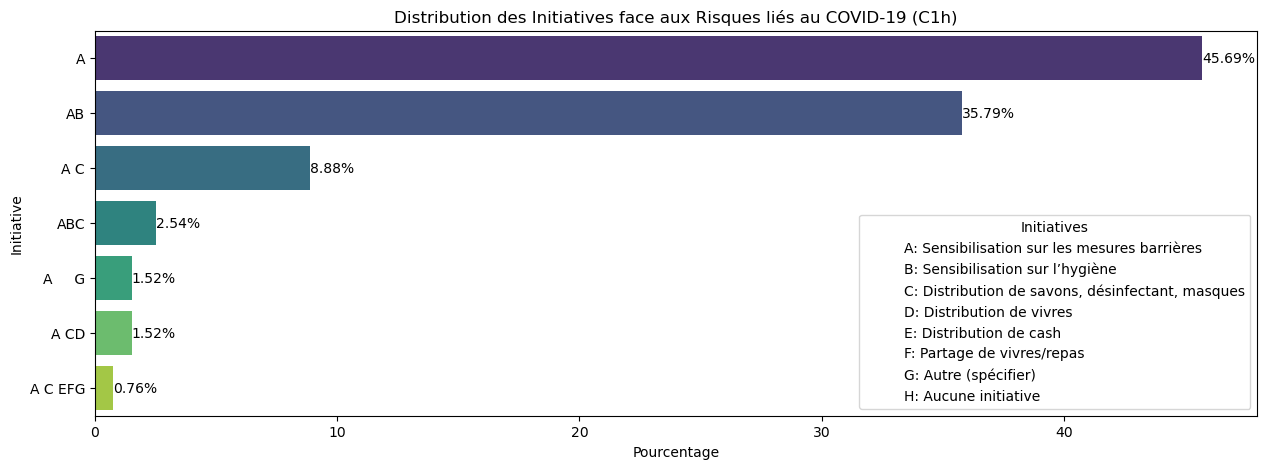

In [42]:
condition = df['C1E'] == 'Oui'
df_filtered = df[condition]
# Mapping between codes and their meanings
initiatives_mapping = {'A': 'Sensibilisation sur les mesures barrières','B': 'Sensibilisation sur l’hygiène','C': 'Distribution de savons, désinfectant, masques','D': 'Distribution de vivres','E': 'Distribution de cash','F': 'Partage de vivres/repas', 'G': 'Autre (spécifier)','H': 'Aucune initiative'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1h = df_filtered['C1H'].value_counts(normalize=True) * 100

# Select only the top 10 initiatives
top_initiatives = percentage_values_C1h.head(7)

# Define smaller bar width
bar_width = 0.4

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_initiatives, y=top_initiatives.index, palette='viridis', errorbar=None, dodge=True, saturation=0.75)

# Adding percentages on the bars
for index, value in enumerate(top_initiatives):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {initiative}')
           for code, initiative in initiatives_mapping.items()]
plt.legend(handles=handles, title='Initiatives', loc='lower right')

plt.title('Distribution des Initiatives face aux Risques liés au COVID-19 (C1h)')
plt.xlabel('Pourcentage')
plt.ylabel('Initiative')
plt.show()


## Assistances

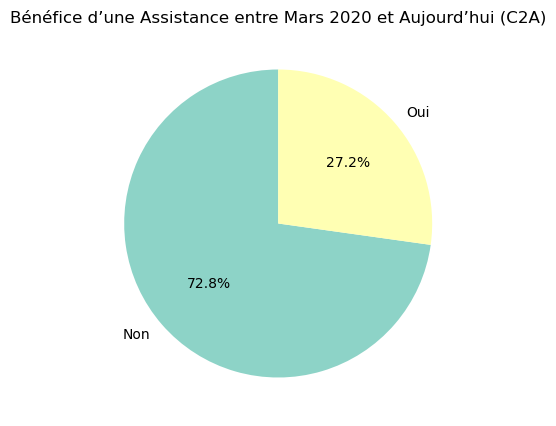

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
assistance = df['C2A'].value_counts()

# Plotting the pie chart
plt.pie(assistance, labels=assistance.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title('Bénéfice d’une Assistance entre Mars 2020 et Aujourd’hui (C2A)')
plt.show()


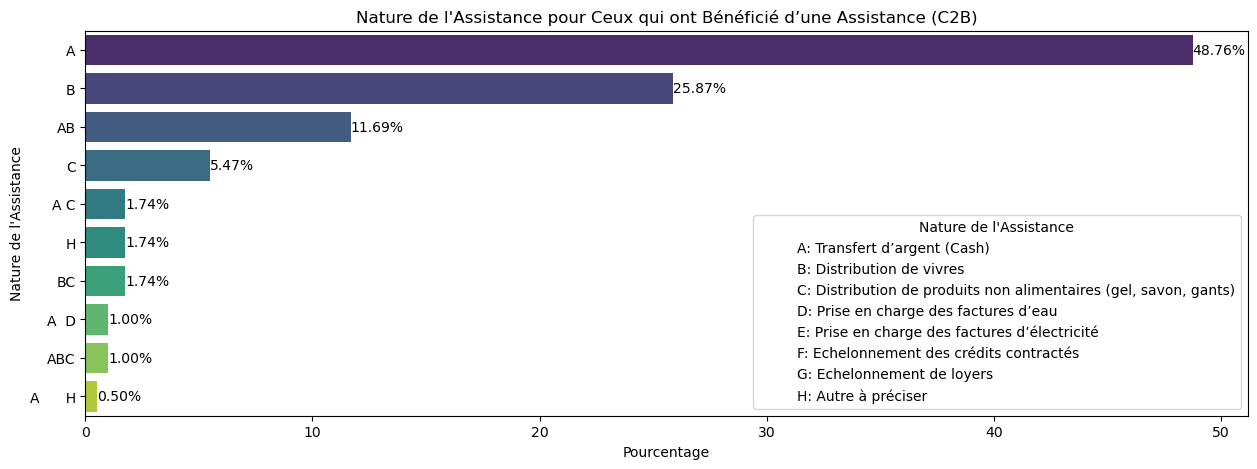

In [44]:

# Condition the DataFrame
condition = df['C2A'] == 'Oui'
df_filtered = df[condition]


assistance_mapping = {
    'A': 'Transfert d’argent (Cash)', 'B': 'Distribution de vivres','C': 'Distribution de produits non alimentaires (gel, savon, gants)', 'D': 'Prise en charge des factures d’eau', 'E': 'Prise en charge des factures d’électricité', 'F': 'Echelonnement des crédits contractés', 'G': 'Echelonnement de loyers', 'H': 'Autre à préciser'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C2B = df_filtered['C2B'].value_counts(normalize=True) * 100

# Select only the top 10 assistance types
top_assistance = percentage_values_C2B.head(10)

# Define smaller bar width
bar_width = 0.4

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_assistance, y=top_assistance.index, palette='viridis', errorbar=None, dodge=True, saturation=0.75)

# Adding percentages on the bars
for index, value in enumerate(top_assistance):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {assistance}')
           for code, assistance in assistance_mapping.items()]
plt.legend(handles=handles, title='Nature de l\'Assistance', loc='lower right')

plt.title('Nature de l\'Assistance pour Ceux qui ont Bénéficié d’une Assistance (C2B)')
plt.xlabel('Pourcentage')
plt.ylabel('Nature de l\'Assistance')
plt.show()


In [45]:
df['C2C'].value_counts()

A       271
C        38
D        31
A C      24
B        22
AB       13
A  D      2
CD        1
Name: C2C, dtype: int64

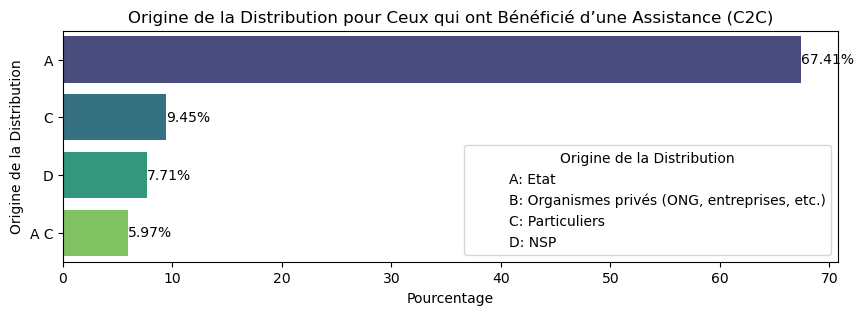

In [46]:
# Condition the DataFrame
condition = df['C2A'] == 'Oui'
df_filtered = df[condition]

# Mapping between codes and their meanings
origin_mapping = {
    'A': 'Etat', 'B': 'Organismes privés (ONG, entreprises, etc.)','C': 'Particuliers', 'D': 'NSP'
}

plt.figure(figsize=(10, 3))

# Calculate percentage values
percentage_values_C2C = df_filtered['C2C'].value_counts(normalize=True) * 100

# Select only the top 4 origins
top_origins = percentage_values_C2C.head(4)

# Define smaller bar width
bar_width = 0.4

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_origins, y=top_origins.index, palette='viridis', errorbar=None, dodge=True, saturation=0.75)

# Adding percentages on the bars
for index, value in enumerate(top_origins):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {origin}')
           for code, origin in origin_mapping.items()]
plt.legend(handles=handles, title='Origine de la Distribution', loc='lower right')

plt.title('Origine de la Distribution pour Ceux qui ont Bénéficié d’une Assistance (C2C)')
plt.xlabel('Pourcentage')
plt.ylabel('Origine de la Distribution')
plt.show()


In [47]:
# # Tracez la distribution des valeurs dans la colonne C2D1
# condition = df['C2A'] == 'Oui'
# df_filtered = df[condition]
# df_filtered['C2D1'].plot(kind='kde')
# # Ajoutez un titre et des étiquettes d'axe
# plt.title("Distribution des montants de transfert (C2D1)")
# plt.xlabel("Montant (MRO)")
# plt.ylabel("Densité")

# plt.show()

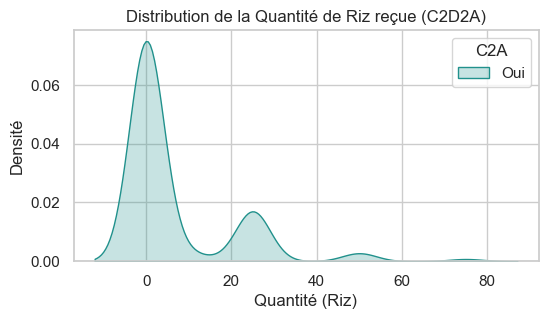

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Condition to filter 'C2A' column
condition = df['C2A'] == 'Oui'

# Filter the DataFrame based on the condition
df_filtered = df[condition]

# Filter out NaN values in 'C2D2A'
filtered_df = df_filtered[df_filtered['C2D2A'].notna()]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a KDE plot using seaborn
plt.figure(figsize=(6, 3))
sns.kdeplot(data=filtered_df, x='C2D2A', hue='C2A', fill=True, common_norm=False, palette='viridis')
plt.title("Distribution de la Quantité de Riz reçue (C2D2A)")
plt.xlabel("Quantité (Riz)")
plt.ylabel("Densité")
plt.show()


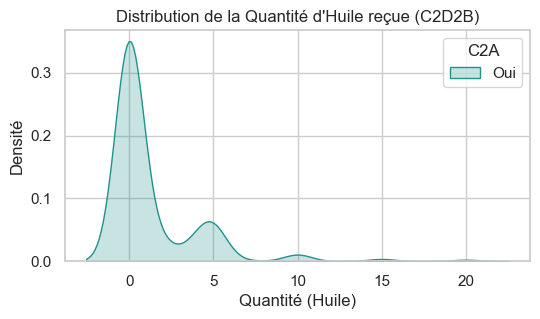

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Condition to filter 'C2A' column
condition = df['C2A'] == 'Oui'

# Filter the DataFrame based on the condition
df_filtered = df[condition]

# Filter out NaN values in 'C2D2B'
filtered_df_b = df_filtered[df_filtered['C2D2B'].notna()]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a KDE plot for 'C2D2B' (Huile)
plt.figure(figsize=(6, 3))
sns.kdeplot(data=filtered_df_b, x='C2D2B', hue='C2A', fill=True, common_norm=False, palette='viridis')
plt.title("Distribution de la Quantité d'Huile reçue (C2D2B)")
plt.xlabel("Quantité (Huile)")
plt.ylabel("Densité")
plt.show()


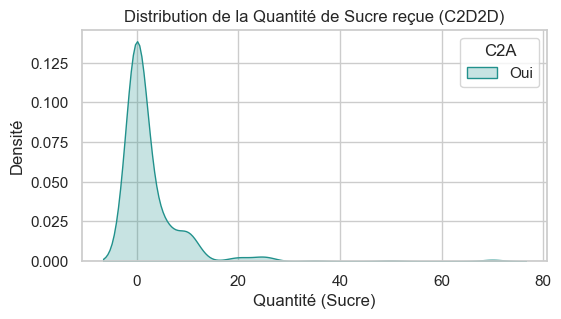

In [50]:
# Filter out NaN values in 'C2D2D'
filtered_df_d = df_filtered[df_filtered['C2D2D'].notna()]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a KDE plot for 'C2D2D' (Sucre)
plt.figure(figsize=(6, 3))
sns.kdeplot(data=filtered_df_d, x='C2D2D', hue='C2A', fill=True, common_norm=False, palette='viridis')
plt.title("Distribution de la Quantité de Sucre reçue (C2D2D)")
plt.xlabel("Quantité (Sucre)")
plt.ylabel("Densité")
plt.show()


In [51]:
df_filtered['C2EA']

6          L’alimentation
7          L’alimentation
8          L’alimentation
10         L’alimentation
14      Aucune difficulté
              ...        
1424            Téléphone
1425            Téléphone
1448    Aucune difficulté
1457       L’alimentation
1459    Aucune difficulté
Name: C2EA, Length: 402, dtype: object

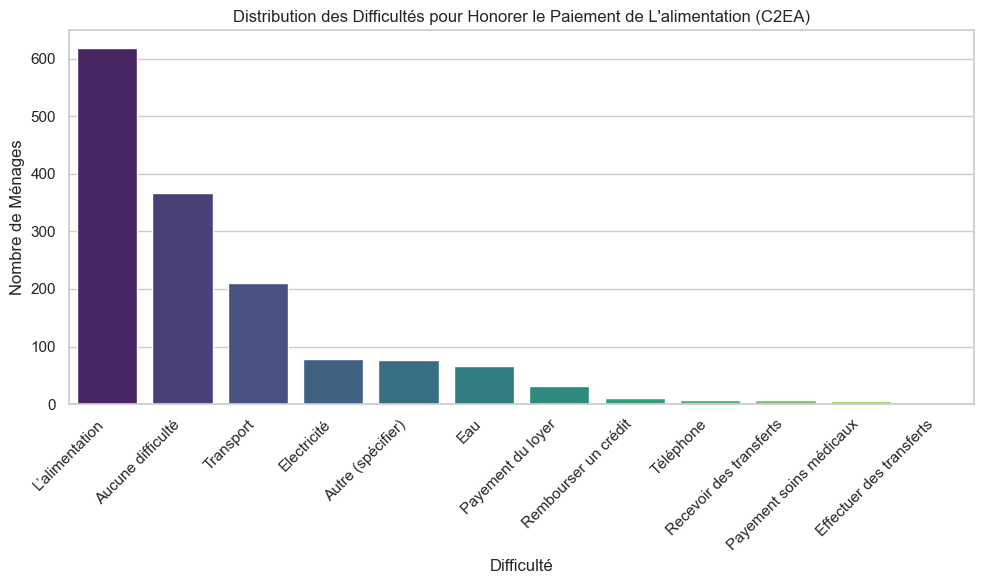

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# 
plt.figure(figsize=(10, 6))
sns.countplot(x='C2EA', data=df, order=df['C2EA'].value_counts().index, palette='viridis')
plt.title("Distribution des Difficultés pour Honorer le Paiement de L'alimentation (C2EA)")
plt.xlabel("Difficulté")
plt.ylabel("Nombre de Ménages")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


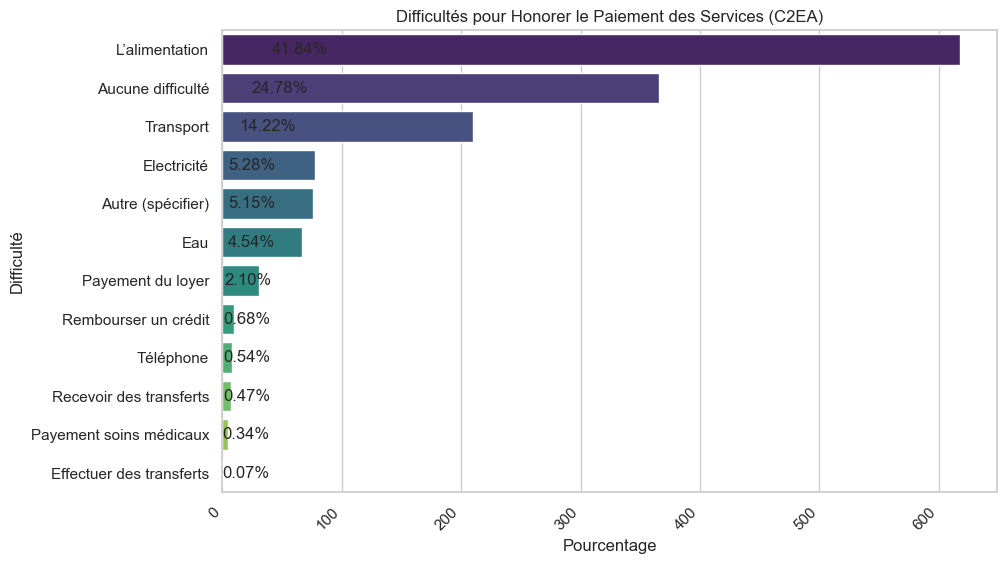

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping between codes and their meanings


# 
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
sns.countplot(y='C2EA', data=df, order=df['C2EA'].value_counts().index, palette='viridis')

# Adding percentages on the bars
for index, value in enumerate(df['C2EA'].value_counts(normalize=True) * 100):
    plt.text(value, index, f'{value:.2f}%', va='center')



plt.title('Difficultés pour Honorer le Paiement des Services (C2EA)')
plt.xlabel('Pourcentage')
plt.ylabel('Difficulté')
plt.xticks(rotation=45, ha='right') 
plt.show()


## ACCES AUX SERVICES DE BASE

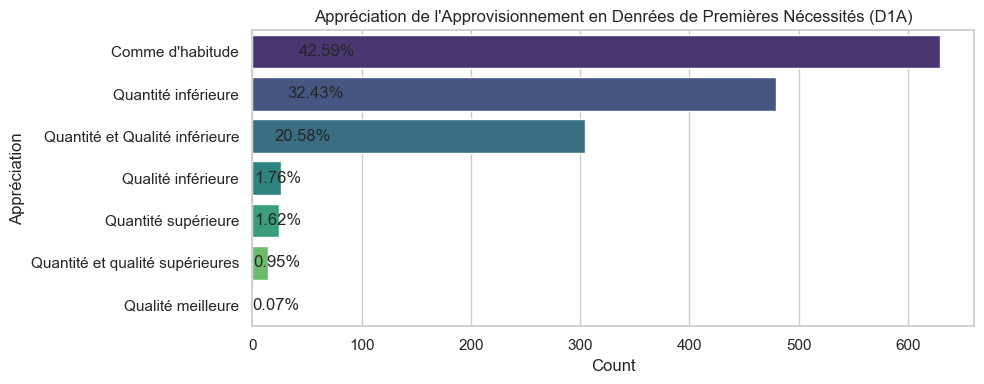

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Create a horizontal bar plot for 'D1A'
sns.countplot(y='D1A', data=df, palette='viridis', order=df['D1A'].value_counts().index)

# Adding percentages on the bars
for index, value in enumerate(df['D1A'].value_counts(normalize=True) * 100):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.title("Appréciation de l'Approvisionnement en Denrées de Premières Nécessités (D1A)")
plt.xlabel('Count')
plt.ylabel('Appréciation')
plt.tight_layout()

plt.show()


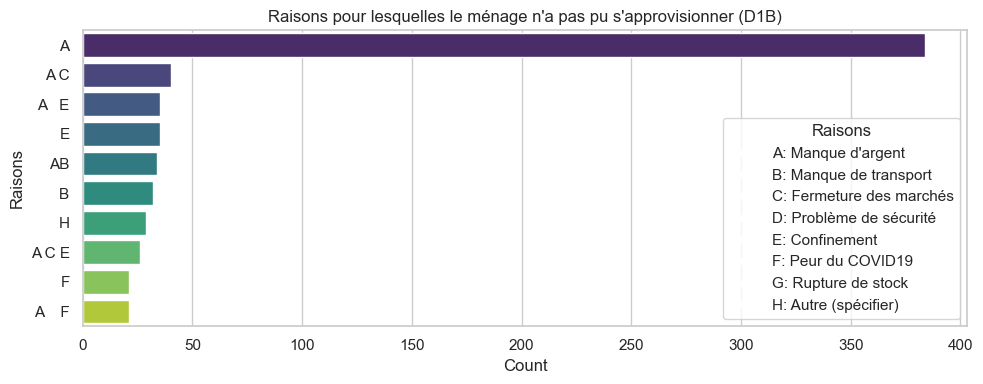

In [55]:

reasons_mapping_D1B = {
    'A': "Manque d'argent",
'B': 'Manque de transport','C': 'Fermeture des marchés','D': 'Problème de sécurité', 'E': 'Confinement',    'F': 'Peur du COVID19',    'G': 'Rupture de stock','H': 'Autre (spécifier)'}

# 
plt.figure(figsize=(10, 4))

# Create a horizontal bar plot for 'D1B' with the top 10 bars
top_reasons_D1B = df['D1B'].value_counts().head(10)
sns.countplot(y='D1B', data=df, palette='viridis', order=top_reasons_D1B.index)
# Adding percentages on the bars
# for index, value in enumerate(df['D1B'].value_counts(normalize=True) * 100):
#     plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles_D1B = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {reason}')
                for code, reason in reasons_mapping_D1B.items()]
plt.legend(handles=handles_D1B, title='Raisons', loc='lower right')

plt.title("Raisons pour lesquelles le ménage n'a pas pu s'approvisionner (D1B)")
plt.xlabel('Count')
plt.ylabel('Raisons')
plt.tight_layout()

plt.show()


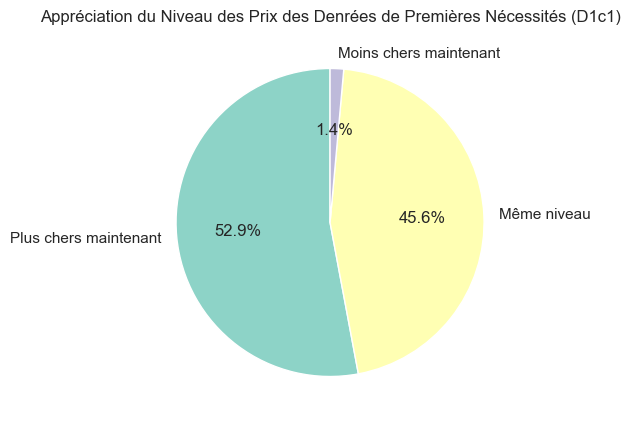

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
plt.figure(figsize=(5,5))

# Count the occurrences of each value in 'D1c1'
count_values = df['D1C1'].value_counts()

# Plot the pie chart
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title("Appréciation du Niveau des Prix des Denrées de Premières Nécessités (D1c1)")
plt.show()


## Santé

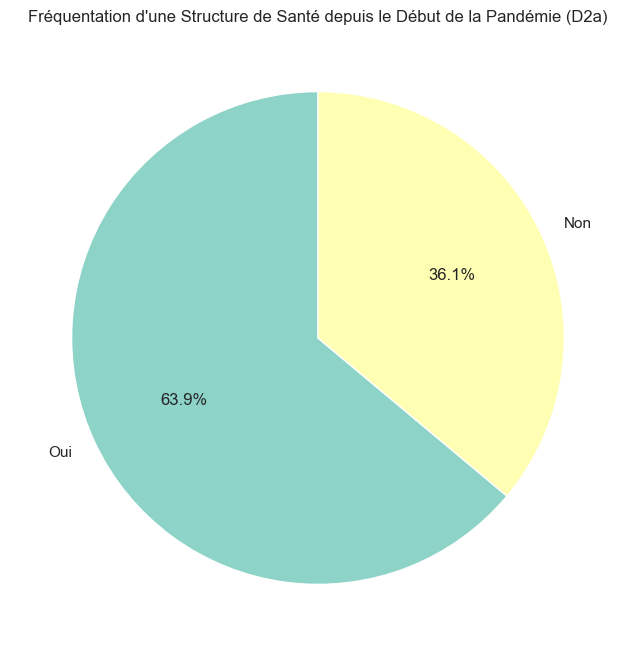

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
plt.figure(figsize=(8, 8))

# Count the occurrences of each value in 'D2A'
count_values = df['D2A'].value_counts()

# Plot the pie chart
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title("Fréquentation d'une Structure de Santé depuis le Début de la Pandémie (D2a)")
plt.show()


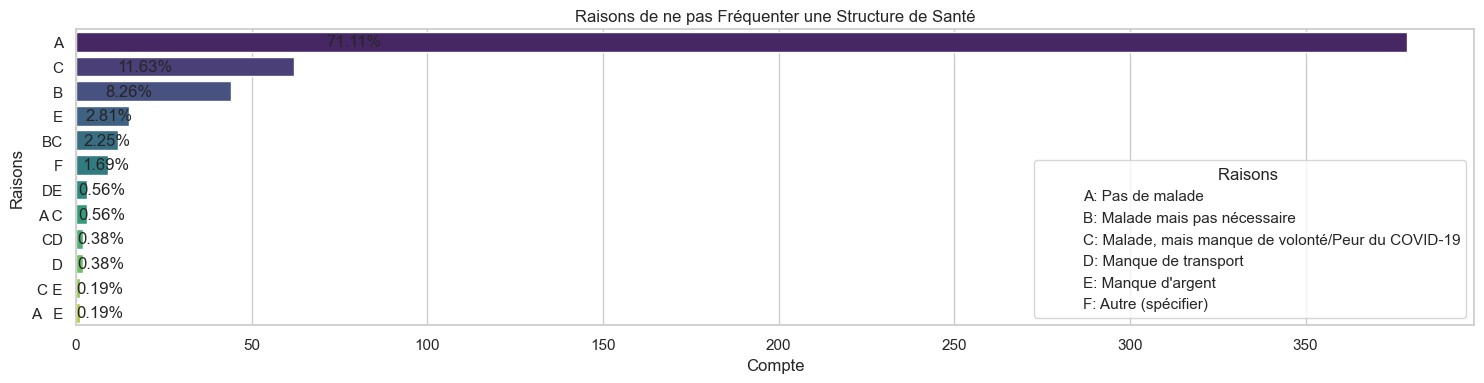

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

condition = df['D2A'] == 'Non'


df_filtered = df[condition]
# Mapping between codes and their meanings
reasons_mapping = {
    'A': 'Pas de malade',
    'B': 'Malade mais pas nécessaire',
    'C': 'Malade, mais manque de volonté/Peur du COVID-19',
    'D': 'Manque de transport',
    'E': "Manque d'argent",
    'F': 'Autre (spécifier)'
}

# 
plt.figure(figsize=(15, 4))

# Order the bars based on value counts
order = df_filtered['D2B'].value_counts().index

# Create a horizontal count plot
sns.countplot(y='D2B', data=df_filtered, order=order, palette='viridis')
# Adding percentages on the bars
for index, value in enumerate(df_filtered['D2B'].value_counts(normalize=True) * 100):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {reason}')
           for code, reason in reasons_mapping.items()]
plt.legend(handles=handles, title='Raisons ', loc='lower right')

plt.title('Raisons de ne pas Fréquenter une Structure de Santé')
plt.xlabel('Compte')
plt.ylabel('Raisons')
plt.tight_layout()

plt.show()


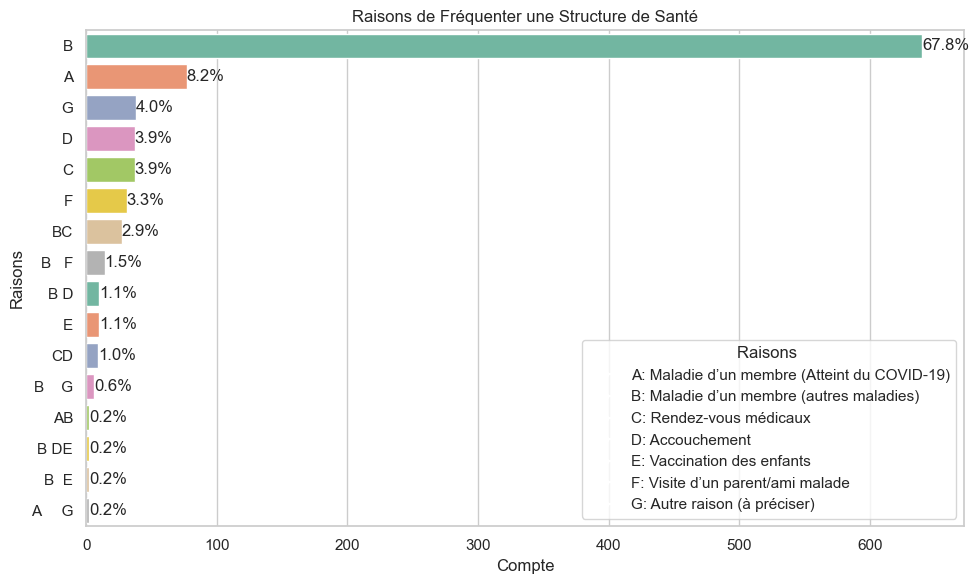

In [59]:
condition = df['D2A'] == 'Oui'

df_filtered = df[condition]
# Mapping between codes and their meanings
reasons_mapping_d2c = {
    'A': 'Maladie d’un membre (Atteint du COVID-19)',
    'B': 'Maladie d’un membre (autres maladies)',
    'C': 'Rendez-vous médicaux',
    'D': 'Accouchement',
    'E': 'Vaccination des enfants',
    'F': 'Visite d’un parent/ami malade',
    'G': 'Autre raison (à préciser)'
}

# 
plt.figure(figsize=(10, 6))

# Order the bars based on value counts
order = df_filtered['D2C'].value_counts().index

# Create a horizontal count plot
ax = sns.countplot(y='D2C', data=df_filtered, order=order, palette='Set2')

# Adding legend
handles_d2c = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {reason}')
               for code, reason in reasons_mapping_d2c.items()]
plt.legend(handles=handles_d2c, title='Raisons ', loc='lower right')

# Add percentages on the bars
total_d2c = len(df_filtered['D2C'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_d2c)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center')

plt.title('Raisons de Fréquenter une Structure de Santé')
plt.xlabel('Compte')
plt.ylabel('Raisons')
plt.tight_layout()

plt.show()


## EDUCATION

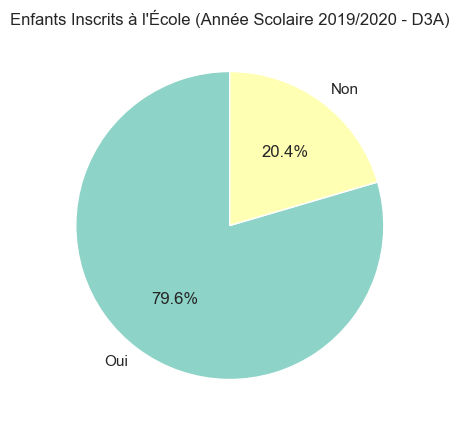

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
plt.figure(figsize=(5, 5))

# Plotting the pie chart for 'D3A'
education_counts = df['D3A'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title("Enfants Inscrits à l'École (Année Scolaire 2019/2020 - D3A)")
plt.show()


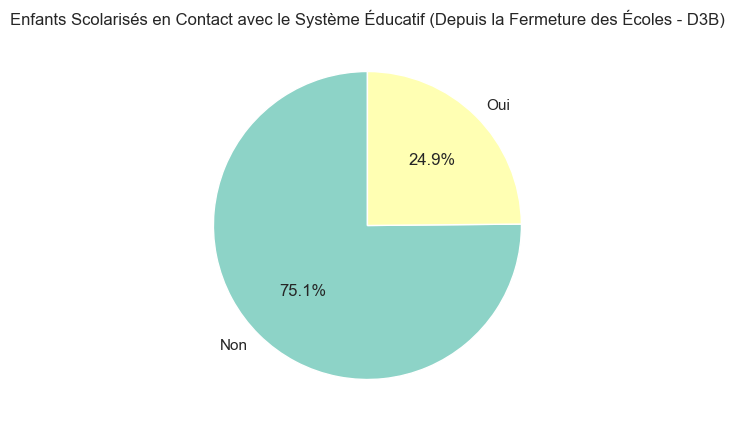

In [61]:
condition_d3a = df['D3A'] == 'Oui'

# Filter the DataFrame based on the condition
df_filtered_education = df[condition_d3a]

# 
plt.figure(figsize=(5, 5))

# Plotting the pie chart for 'D3B'
education_contact_counts = df_filtered_education['D3B'].value_counts()
plt.pie(education_contact_counts, labels=education_contact_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title("Enfants Scolarisés en Contact avec le Système Éducatif (Depuis la Fermeture des Écoles - D3B)")
plt.show()


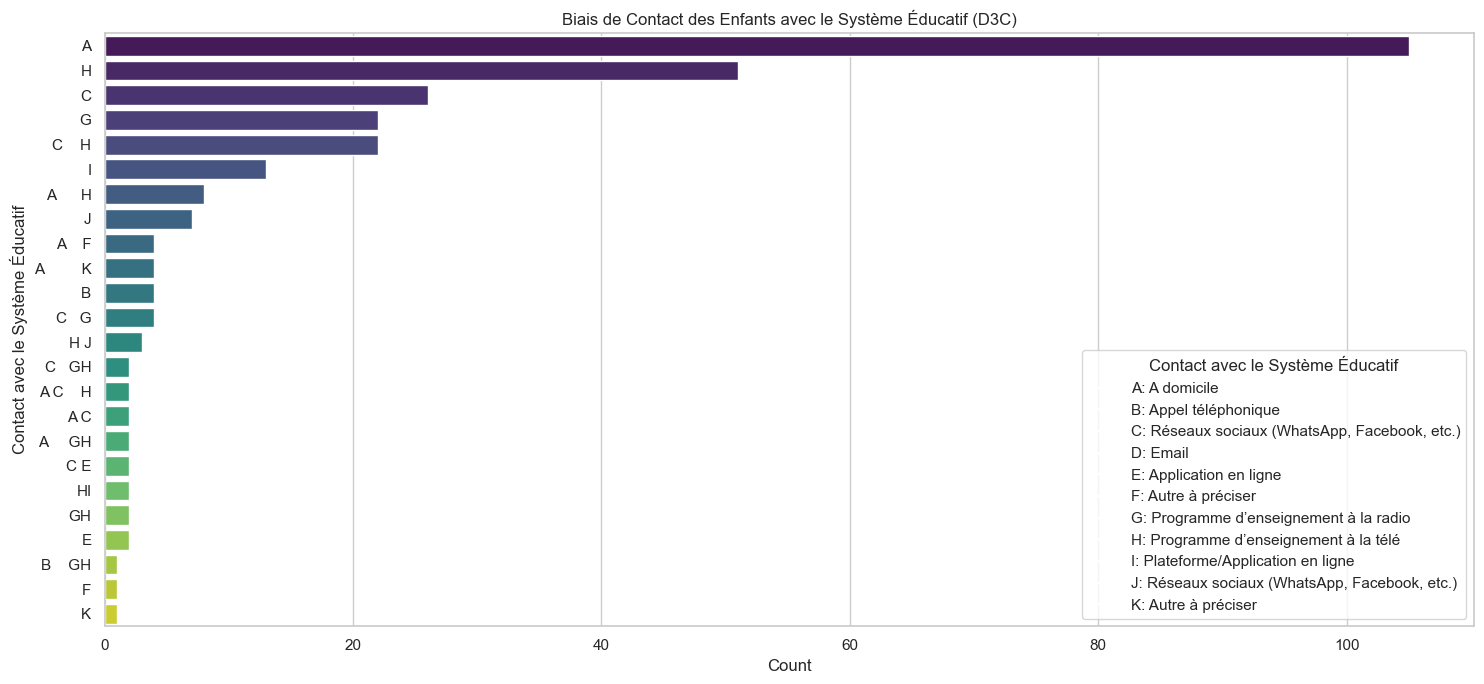

In [62]:
condition_d3a = df['D3A'] == 'Oui'

# Filter the DataFrame based on the condition
df_filtered_education = df[condition_d3a]

# Mapping between codes and their meanings
education_contact_mapping = {
    'A': 'A domicile',    'B': 'Appel téléphonique',    'C': 'Réseaux sociaux (WhatsApp, Facebook, etc.)',    'D': 'Email',   'E': 'Application en ligne',    'F': 'Autre à préciser', 'G': 'Programme d’enseignement à la radio',    'H': 'Programme d’enseignement à la télé',   'I': 'Plateforme/Application en ligne',    'J': 'Réseaux sociaux (WhatsApp, Facebook, etc.)',    'K': 'Autre à préciser'}

plt.figure(figsize=(15, 7))

# Create a horizontal bar plot for 'D3C'
sns.countplot(y='D3C', data=df_filtered_education, palette='viridis', order=df_filtered_education['D3C'].value_counts().index)

# Adding legend
handles_education_contact = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {contact}')
                              for code, contact in education_contact_mapping.items()]
plt.legend(handles=handles_education_contact, title='Contact avec le Système Éducatif', loc='lower right')

plt.title("Biais de Contact des Enfants avec le Système Éducatif (D3C)")
plt.xlabel('Count')
plt.ylabel('Contact avec le Système Éducatif')
plt.tight_layout()

plt.show()


In [63]:
df['D3E']

0         A
1         A
2         A
3       NaN
4       NaN
       ... 
1472      F
1473      F
1474    NaN
1475    NaN
1476    NaN
Name: D3E, Length: 1477, dtype: object

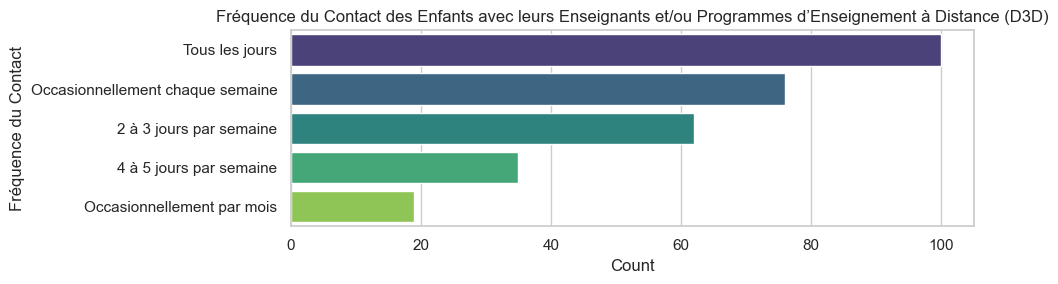

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Condition to filter based on 'D3A'
condition_d3a = df['D3A'] == 'Oui'

# Filter the DataFrame based on the condition
df_filtered_education = df[condition_d3a]

plt.figure(figsize=(10, 3))

# Create a horizontal bar plot for 'D3D'
sns.countplot(y='D3D', data=df_filtered_education, palette='viridis', order=df_filtered_education['D3D'].value_counts().index)

plt.title("Fréquence du Contact des Enfants avec leurs Enseignants et/ou Programmes d’Enseignement à Distance (D3D)")
plt.xlabel('Count')
plt.ylabel('Fréquence du Contact')
plt.tight_layout()

plt.show()


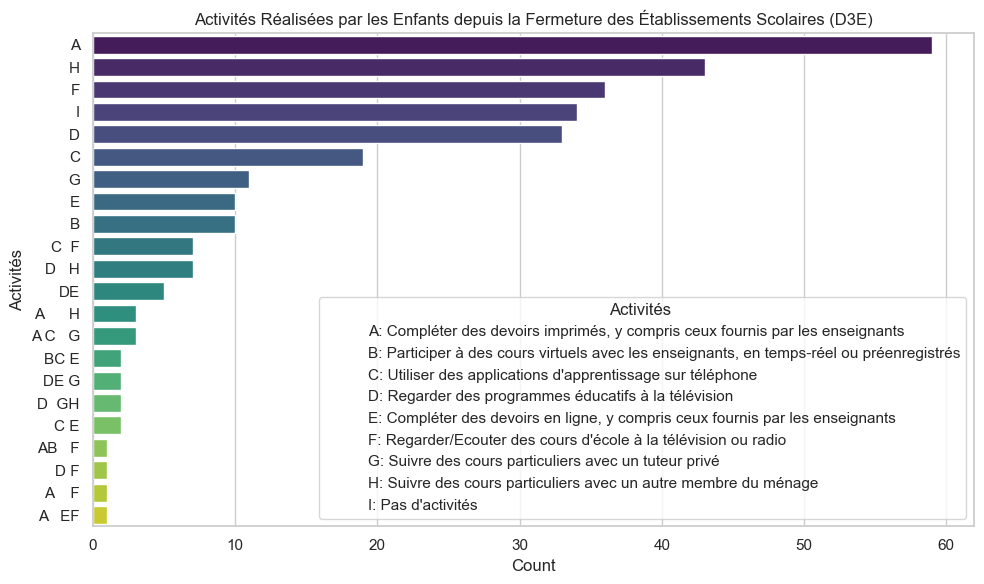

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Condition to filter based on 'D3A'
condition_d3a = df['D3A'] == 'Oui'

# Filter the DataFrame based on the condition
df_filtered_education = df[condition_d3a]

# Mapping between codes and their meanings
activities_mapping_d3e = {
    'A': 'Compléter des devoirs imprimés, y compris ceux fournis par les enseignants','B': 'Participer à des cours virtuels avec les enseignants, en temps-réel ou préenregistrés',    'C': 'Utiliser des applications d\'apprentissage sur téléphone',    'D': 'Regarder des programmes éducatifs à la télévision',    'E': 'Compléter des devoirs en ligne, y compris ceux fournis par les enseignants',    'F': 'Regarder/Ecouter des cours d\'école à la télévision ou radio',    'G': 'Suivre des cours particuliers avec un tuteur privé',    'H': 'Suivre des cours particuliers avec un autre membre du ménage',    'I': 'Pas d\'activités'
}

plt.figure(figsize=(10, 6))

# Create a horizontal bar plot for 'D3E' with handles
sns.countplot(y='D3E', data=df_filtered_education, palette='viridis', order=df_filtered_education['D3E'].value_counts().index)

# Adding legend
handles_d3e = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {activity}')
               for code, activity in activities_mapping_d3e.items()]
plt.legend(handles=handles_d3e, title='Activités ', loc='lower right')

plt.title("Activités Réalisées par les Enfants depuis la Fermeture des Établissements Scolaires (D3E)")
plt.xlabel('Count')
plt.ylabel('Activités')
plt.tight_layout()

plt.show()

In [66]:
dfc=df.copy()

In [67]:
snma

NameError: name 'snma' is not defined

In [ ]:
# df=dfc

# Feature Engineering:

In [68]:
# Condition to filter 'D2A' column
condition_d2a = df['D2A'] == 'Oui'
# Create a binary column 'Covid' based on the condition
df['Covid'] = 0  # Initialize to 0
df.loc[condition_d2a & (df['D2C'] == 'A'), 'Covid'] = 1
df = df[condition_d2a].copy()



Ce code attribue la valeur 1 à la colonne 'Covid' uniquement pour les lignes où 'D2A' est 'Oui' et 'D2C' est 'A', et 0 dans les autres cas. De cette manière, vous capturez les instances où il y a une visite dans une structure de santé, et si elle est liée ou non au COVID-19.

In [69]:
df.columns

Index(['Wilaya', 'Moughataa', 'Commune', 'Sexe', 'Age', 'C1A', 'C1B', 'C1C',
       'C1D', 'C1E', 'C1F', 'C1G', 'C1H', 'C2A', 'C2B', 'C2C', 'C2D1', 'C2D2A',
       'C2D2B', 'C2D2D', 'C2D2E', 'C2D2F', 'C2EA', 'D1A', 'D1B', 'D1C1', 'D2A',
       'D2B', 'D2C', 'D2DA', 'D2DC', 'D2DD', 'D2DE', 'D2EA', 'D2EB', 'D2EC',
       'D2ED', 'D2EE', 'D2EF', 'D2EG', 'D3A', 'D3B', 'D3C', 'D3D', 'D3E',
       'E1A', 'E1B', 'E1C', 'E1D', 'E2A', 'E2B', 'E3A', 'E2C', 'E3C', 'E3D',
       'E3E', 'E4C', 'E4D', 'E4E', 'E3B', 'E4A', 'E4B', 'E5', 'F1', 'F3', 'F4',
       'F5', 'F2A', 'F2B', 'F6A', 'F6B', 'F6C', 'F6D', 'F6E', 'F6F', 'F7A',
       'F7B', 'F7C', 'F7D', 'F7E', 'F7F', 'Covid'],
      dtype='object')

In [70]:
df.drop(columns=['D2A', 'D2C'], inplace=True)

In [71]:
# df= df.dropna()

In [72]:
df.shape

(944, 80)

# Data Splitting

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Selecting columns for one-hot encoding (excluding 'Covid')
categorical_columns = df.select_dtypes(include=['object']).columns

# Instantiate OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to selected categorical columns
ct = ColumnTransformer([('encoder', onehot_encoder, categorical_columns)], remainder='passthrough')
df_encoded = pd.DataFrame(ct.fit_transform(df))

# Rename columns with the feature names
df_encoded.columns = ct.get_feature_names_out()

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df.drop(categorical_columns, axis=1), df_encoded], axis=1)

# Selecting numerical columns for normalization
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Covid'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [76]:
from sklearn.model_selection import train_test_split
# Drop rows with missing values
df_no_missing = df.dropna()

# Split the data again
X = df_no_missing.drop('Covid', axis=1)
y = df_no_missing['Covid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
df_no_missing.shape

(613, 848)

In [78]:
print(y_train.dtypes)

float64


In [79]:
y_train = y_train.astype(int)


In [80]:
y_test= y_test.astype(int)

In [81]:
print(y_train.unique())
print(y_test.unique())

[0 1]
[0 1]


# Model Creation &  Model Training

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [111]:
# Train the model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)



Accuracy: 0.8699186991869918


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)



Accuracy: 0.8943089430894309


In [103]:
from sklearn.svm import SVC

# Create an SVC (Support Vector Classification) model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)



Accuracy: 0.9024390243902439


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8780487804878049


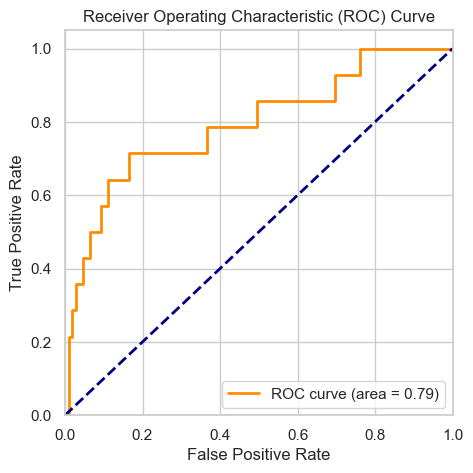

In [120]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')
# Plot ROC curve
plt.figure(figsize=(5,5 ))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.8699186991869918


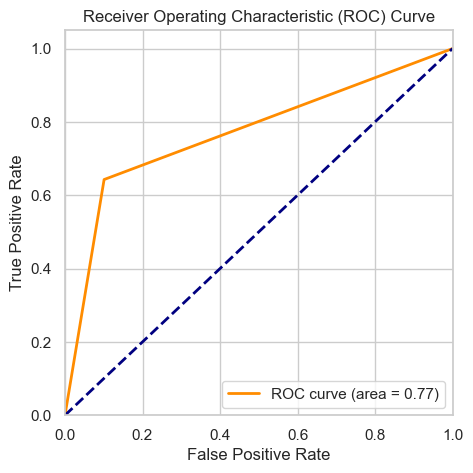

In [121]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)
# Get the predicted probabilities for the positive class
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
# Plot ROC curve
plt.figure(figsize=(5,5 ))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.8943089430894309


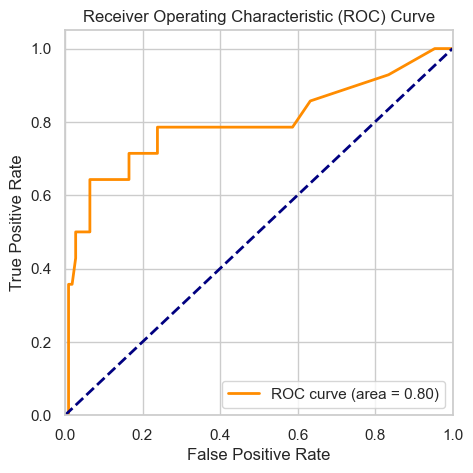

In [122]:
# Make predictions on the test set
y_pred = gb_model.predict(X_test)
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Plot ROC curve
plt.figure(figsize=(5,5 ))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9024390243902439


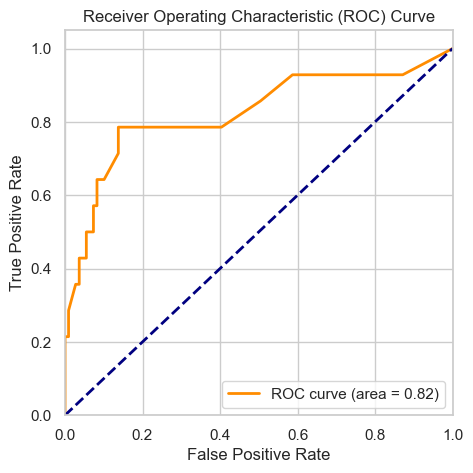

In [123]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


# Get the predicted probabilities for the positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Plot ROC curve
plt.figure(figsize=(5,5 ))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Tune Hyperparameters

In [107]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500],
    'max_depth': [10, 20, 30,40,50,60]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))



Best Parameters:  {'max_depth': 20, 'n_estimators': 50}
Best Accuracy: 0.93


In [108]:

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9024390243902439


# Model Interpretation